<a href="https://colab.research.google.com/github/Manikethan38/UNP_Assignment/blob/main/Assisgnment5pythonrevision_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import datetime

In [2]:
data = pd.read_excel("Housing.xlsx",index_col=0)
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
UniqueID,,,,,,,,,,,,
2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.3,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.5,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.9,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.6,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.0,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CLEANING DATA

1.Replace the missing values with appropriate approximations

In [3]:
data['Acre']=data["Acre"].fillna(np.mean(data["Acre"]))
data['LandValue']=data["LandValue"].fillna(np.mean(data["LandValue"]))
data['BuildingValue']=data["BuildingValue"].fillna(np.mean(data["BuildingValue"]))
data['TotalValue']=data["TotalValue"].fillna(np.mean(data["TotalValue"]))
data['YearBuilt']=data["YearBuilt"].fillna(np.mean(data["YearBuilt"]))
data['Bedrooms']=data["Bedrooms"].fillna(np.mean(data["Bedrooms"]))
data['FullBath']=data["FullBath"].fillna(np.mean(data["FullBath"]))
data['HalfBath']=data["HalfBath"].fillna(np.mean(data["HalfBath"]))
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
UniqueID,,,,,,,,,,,,
2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000
16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000
54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000
43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000
22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921
27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921
52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921


1.Rename the columns to better suited names

In [4]:
data.rename(columns={"FullBath":"FullBathroom"},inplace=True)
data.rename(columns={"HalfBath":"HalfBathroom"},inplace=True)
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom
UniqueID,,,,,,,,,,,,
2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000
16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000
54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000
43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000
22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921
27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921
52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921


1.Extract the month and year from the sale date.

In [5]:
data['Year']=pd.DatetimeIndex(data['SaleDate']).year
data['Month']=pd.DatetimeIndex(data['SaleDate']).month
data['Day']=pd.DatetimeIndex(data['SaleDate']).day
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day
UniqueID,,,,,,,,,,,,,,,
2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000,2013,4,9
16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000,2014,6,10
54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000,2016,9,26
43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000,2016,1,29
22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000,2014,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,5,27
27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,3,2
52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,8,16


1.Extract the pin number from the property address

In [6]:
data['Pin'] = data['PropertyAddress'].str.slice(0, 4)
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day,Pin
UniqueID,,,,,,,,,,,,,,,,
2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000,2013,4,9,1808
16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000,2014,6,10,1832
54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000,2016,9,26,1864
43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000,2016,1,29,1853
22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000,2014,10,10,1829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,5,27,1435
27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,3,2,1423
52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,8,16,1804


In [7]:
data['Property'] = data['PropertyAddress'].str.slice(18, 32)
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day,Pin,Property
UniqueID,,,,,,,,,,,,,,,,,
2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000,2013,4,9,1808,", GOODLETTSVIL"
16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000,2014,6,10,1832,", GOODLETTSVIL"
54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000,2016,9,26,1864,", GOODLETTSVIL"
43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000,2016,1,29,1853,", GOODLETTSVIL"
22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000,2014,10,10,1829,", GOODLETTSVIL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,5,27,1435,"K DR, NOLENSVI"
27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,3,2,1423,"K DR, NOLENSVI"
52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,8,16,1804,"LN, NOLENSVILL"


EDA

1.How has the price of properties changed over the years

In [8]:
a = data.groupby('Year')['SalePrice'].count()
a

Year
2013    11292
2014    14283
2015    16829
2016    14071
2019        2
Name: SalePrice, dtype: int64

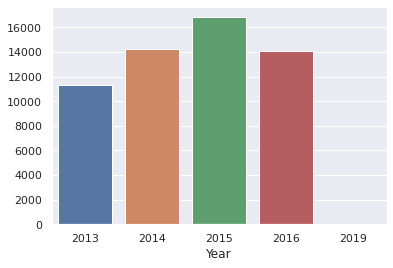

In [9]:
sns.barplot(x=a.index, y=a.values)

1.Does a specific month or span of months have the highest property prices?

In [10]:
b=data.groupby('Month')['SalePrice'].count()
b

Month
1     3227
2     2778
3     4474
4     5223
5     5932
6     6593
7     5471
8     5620
9     5451
10    4822
11    3114
12    3772
Name: SalePrice, dtype: int64

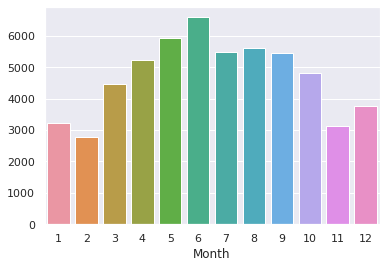

In [12]:
sns.barplot(x=b.index, y=b.values)


([<matplotlib.patches.Wedge at 0x7f4c788f4550>,
 [Text(1.0823253561428419, 0.1963971065221455, '1'),
  Text(0.9581121237361517, 0.5403898207311101, '2'),
  Text(0.669077134915978, 0.8731184269803418, '3'),
  Text(0.12562097733416022, 1.0928034452972823, '4'),
  Text(-0.533206442193423, 0.9621283126503617, '5'),
  Text(-1.0263448877584371, 0.39574761069666753, '6'),
  Text(-1.0498735320672372, -0.3282766617727549, '7'),
  Text(-0.6664027529579892, -0.8751613398968291, '8'),
  Text(-0.03844919297486516, -1.099327821698142, '9'),
  Text(0.5622302755485646, -0.9454613250982746, '10'),
  Text(0.9122792080051296, -0.6146109717874662, '11'),
  Text(1.0758749374096637, -0.2291137688000277, '12')])

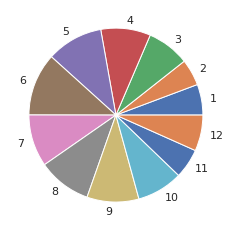

In [13]:
plt.pie(b,labels=b.index)

1.For what purpose were the properties generally purchased?

In [14]:
c=data.groupby('LandUse')['SalePrice'].count()
c

LandUse
APARTMENT: LOW RISE (BUILT SINCE 1960)            2
CHURCH                                           34
CLUB/UNION HALL/LODGE                             1
CONDO                                           247
CONDOMINIUM OFC  OR OTHER COM CONDO              35
CONVENIENCE MARKET WITHOUT GAS                    1
DAY CARE CENTER                                   2
DORMITORY/BOARDING HOUSE                         19
DUPLEX                                         1373
FOREST                                           10
GREENBELT                                        10
GREENBELT/RES_x000D_\nGRRENBELT/RES               3
LIGHT MANUFACTURING                               1
METRO OTHER THAN OFC, SCHOOL,HOSP, OR PARK        1
MOBILE HOME                                      20
MORTUARY/CEMETERY                                 1
NIGHTCLUB/LOUNGE                                  1
NON-PROFIT CHARITABLE SERVICE                     2
OFFICE BLDG (ONE OR TWO STORIES)                  2
ONE 

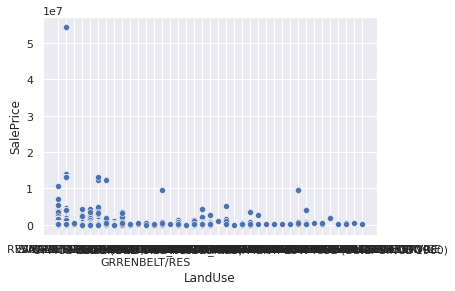

In [15]:
sns.scatterplot(x='LandUse', y='SalePrice', data=data);

1.What is the average age of the properties?

In [17]:
data['Age']=data['Year']-data['YearBuilt']
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day,Pin,Property,Age
UniqueID,,,,,,,,,,,,,,,,,,
2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000,2013,4,9,1808,", GOODLETTSVIL",27.000000
16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000,2014,6,10,1832,", GOODLETTSVIL",16.000000
54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000,2016,9,26,1864,", GOODLETTSVIL",29.000000
43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000,2016,1,29,1853,", GOODLETTSVIL",31.000000
22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000,2014,10,10,1829,", GOODLETTSVIL",30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,5,27,1435,"K DR, NOLENSVI",51.255101
27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,3,2,1423,"K DR, NOLENSVI",51.255101
52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,8,16,1804,"LN, NOLENSVILL",52.255101


1.Have the number of rooms in the house affected the price?

In [19]:
data["TotalRooms"]=data['Bedrooms']+data['FullBathroom']+data['HalfBathroom']
data

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day,Pin,Property,Age,TotalRooms
UniqueID,,,,,,,,,,,,,,,,,,,
2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000,2013,4,9,1808,", GOODLETTSVIL",27.000000,6.000000
16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000,2014,6,10,1832,", GOODLETTSVIL",16.000000,8.000000
54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000,2016,9,26,1864,", GOODLETTSVIL",29.000000,7.000000
43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000,2016,1,29,1853,", GOODLETTSVIL",31.000000,6.000000
22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000,2014,10,10,1829,", GOODLETTSVIL",30.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,5,27,1435,"K DR, NOLENSVI",51.255101,5.259848
27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,3,2,1423,"K DR, NOLENSVI",51.255101,5.259848
52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,8,16,1804,"LN, NOLENSVILL",52.255101,5.259848


In [20]:
d=data.groupby('TotalRooms')['SalePrice'].count()
d

TotalRooms
0.000000        40
1.000000         2
2.000000        95
3.000000      3450
3.089912       118
3.283921         1
4.000000      4243
4.283921         7
5.000000      7366
5.169936         1
5.259848     32201
5.283921        46
6.000000      4545
6.283921        55
7.000000      1961
7.283921        18
8.000000      1102
8.089912         1
8.283921         4
9.000000       541
10.000000      304
11.000000      202
12.000000       94
13.000000       48
14.000000       19
15.000000        6
16.000000        2
17.000000        2
20.000000        2
22.000000        1
Name: SalePrice, dtype: int64

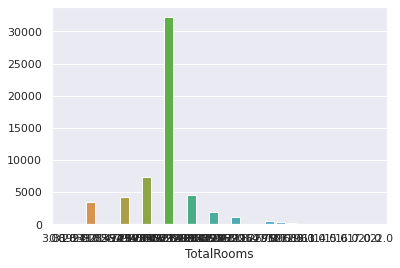

In [21]:
sns.barplot(x=d.index,y=d.values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


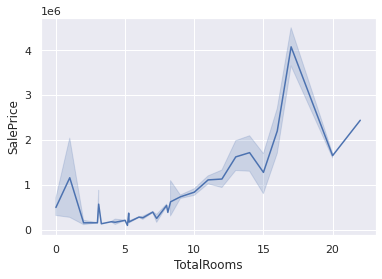

In [22]:
sns.lineplot('TotalRooms','SalePrice',data=data);


1.Does the size of the property (no. of acres) have any influence in its price?

In [23]:
e=data.groupby('Acre')['SalePrice'].count()
e


Acre
0.01       4
0.02       6
0.03       6
0.04      12
0.05      22
          ..
47.50      1
51.34      1
62.96      1
68.79      1
160.06     1
Name: SalePrice, Length: 520, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


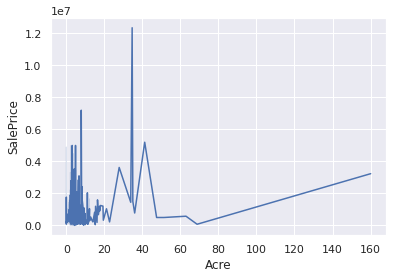

In [24]:
sns.lineplot('Acre', 'SalePrice', data=data);

1.Are houses located in specific pin numbers expensive over the others?

In [25]:
f=data.groupby('SalePrice')['Pin'].count()
f

SalePrice
50           1
100          2
500          1
750          1
800          2
            ..
10750000     1
12350000     2
13156000    92
14100000    23
54278060     7
Name: Pin, Length: 8081, dtype: int64

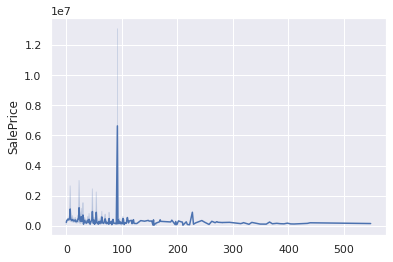

In [26]:
sns.lineplot(x=f.values,y=f.index)

1.How have house prices changed in the 21st centuary as supposed to 20th centuary

In [27]:
g=data.groupby('Year')['BuildingValue'].count()
g

Year
2013    11292
2014    14283
2015    16829
2016    14071
2019        2
Name: BuildingValue, dtype: int64

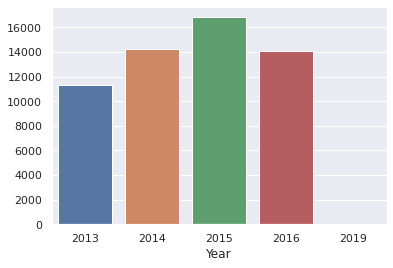

In [28]:
sns.barplot(x=g.index,y=g.values)

In [29]:
cent=data[data["YearBuilt"]>=1900]
cent

,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day,Pin,Property,Age,TotalRooms
UniqueID,,,,,,,,,,,,,,,,,,,
2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000,2013,4,9,1808,", GOODLETTSVIL",27.000000,6.000000
16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000,2014,6,10,1832,", GOODLETTSVIL",16.000000,8.000000
54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000,2016,9,26,1864,", GOODLETTSVIL",29.000000,7.000000
43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000,2016,1,29,1853,", GOODLETTSVIL",31.000000,6.000000
22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000,2014,10,10,1829,", GOODLETTSVIL",30.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,5,27,1435,"K DR, NOLENSVI",51.255101,5.259848
27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,3,2,1423,"K DR, NOLENSVI",51.255101,5.259848
52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,8,16,1804,"LN, NOLENSVILL",52.255101,5.259848


In [30]:
g=data.groupby('YearBuilt')['BuildingValue'].count()
g

YearBuilt
1799.0      1
1832.0      1
1870.0      2
1880.0      1
1890.0      1
         ... 
2013.0    297
2014.0    526
2015.0    712
2016.0    600
2017.0     13
Name: BuildingValue, Length: 127, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


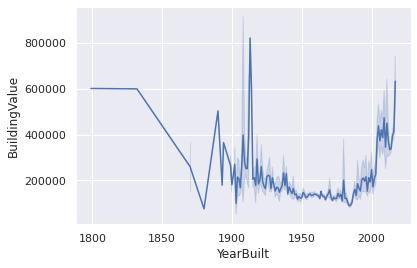

In [31]:
sns.lineplot('YearBuilt', 'BuildingValue', data=data);